# **Machine Learning from Data**
code
#VSC-8da657a4
python
plt.figure(figsize=(6,4))
sns.violinplot(x="species", y="petal_length", data=iris, width=0.8)
plt.show()
metadata
source
Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 
The goal of EDA is to explore the data to reveal patterns and features that will help the analyst better understand, analyze and model the data.


In this part of the lab we will learn how to do basic EDA to explore a simple dataset

##Part2: Iris Dataset

###Importing the required libraries

The first step is to import the libraries we will need: NumPy, Pandas, Matplotlib and Seaborn amd Scipy.stats module.
When importing a library, you can assign it an alias to reduce the amount of typing required to use each library's properties.
The code below shows the necessary import statements:

In [2]:
import numpy as np              #import numpy with the alias np
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
import pandas as pd             #import pandas with the alias pd
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss

###Reading the dataset
####Loading the Iris Dataset

We will uplad a CSV file containing the Iris dataset.

**To get or load the dataset into the notebook:** at the left-hand side of the notebook, you will find a tab with three options, you just have to select Files (or Archivos). Then you can easily upload your file with the help of the Upload option (first icon). There is no need to mount the Google Drive (yet) or use any specific libraries; just upload the file 'iris.csv' downloaded from Atenea. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled.

We can read the CSV into a data frame with Pandas.

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) is a library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. The primary data structures in pandas are implemented as two classes:

  - `DataFrame`, which you can imagine as a relational data table, with rows and named columns.
  - `Series`, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`

Using the Pandas library, you can load a data file into a data frame using the method, `pd.read_csv()`, which is specific to CSV files.


NOTE1: We could also import the dataset from Scikit-learn datasets:
`from sklearn import datasets`
`iris = datasets.load_iris()`

NOTE2:  we cold also download the Iris dataset in the form of a Pandas DataFrame using the seaborn library:
`iris = sns.load_dataset('iris')`

We will explore these options later in other labs.

The **Iris dataset** is a multivariate data set introduced by Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis". See details [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset). The dataset contains samples from 3 classes (50 samples of each class), where each class refers to a type of iris plant: Iris-setosa, Iris-virginica and Iris-Versicolor.



In [3]:
iris = pd.read_csv("iris.csv")

To display the top rows (default 5)

In [4]:
iris.head() # print first rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Each *row* refers to a single observed flower (a sample), and the number of rows is the total number of flowers in the datset.
Each *column* of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features. In this case: sepal_length, sepal_width, petal_length and petal_width. 

Typically, the last column contains the *label* or target values, the quantity we want to *predict from the data*.

To display the bottom rows (default 5)

In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


###Data information
We can check the data types with `iris.dtypes`, or use pandas `DataFrame.info` method, which
prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###Generating descriptive statistics.

Descriptive statistics `.describe()` include basic statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Default percentiles 25, 50 and 75.

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Histograms

First let's see how to plot the histogram of feature "sepal length" for the class "Iris-setosa". 

We get the samples where species is "Iris-setosa" and select the "sepal-length" feature. Then we plot the histogram with the default number of bins.

(50,)


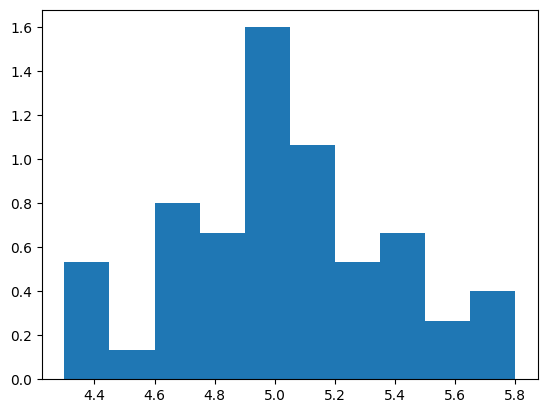

In [9]:
x = iris[iris["species"]== "Iris-setosa"]["sepal_length"]
print(x.shape)
plt.hist(x,density=True)
plt.show()

Now, let's visualize the histograms of all the features per class

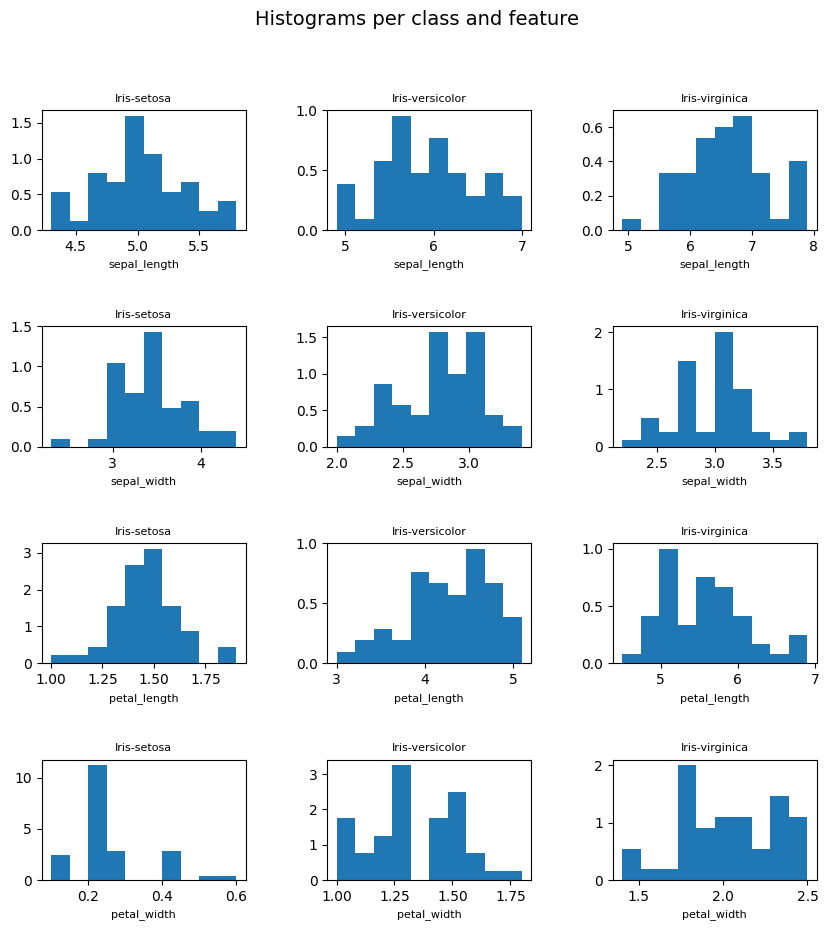

In [10]:
# itererate over the classes and features
# extract the data and plot a separated plot with the histogram

fig, ax = plt.subplots(figsize=(10,10), nrows= 4, ncols=3)
fig.suptitle('Histograms per class and feature', fontsize=14)
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for idx, feat_ in enumerate(["sepal_length","sepal_width","petal_length","petal_width"]):
  for idy, class_ in enumerate(["Iris-setosa","Iris-versicolor","Iris-virginica"]):
  #extract data
    x = iris[iris["species"]== class_][feat_]
    iax = 3*idx+idy+1

    plt.subplot(4,3,iax)
    plt.hist(x,density=True,bins=10)
    plt.title(class_, fontsize=8)
    plt.xlabel(feat_, fontsize=8)
    plt.axis('auto')

plt.show()

###Visualization with Seaborn

Seaborn library aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. For more information see https://seaborn.pydata.org/introduction.html

**Seaborn's FacetGrid:** This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the "hue" parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension


###Histograms and distribution fitting with Seaborn
Plot histograms per feature and class, fitting a normal distribution

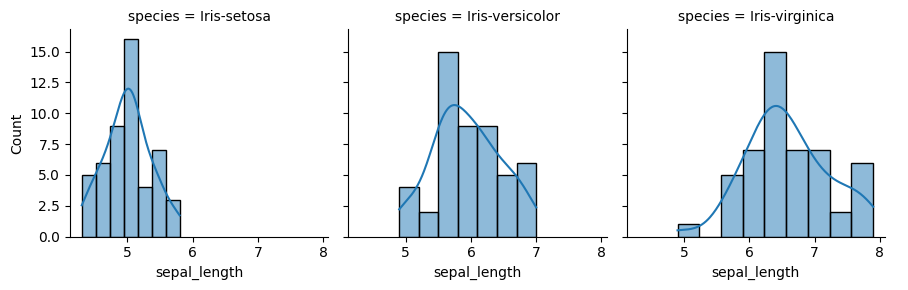

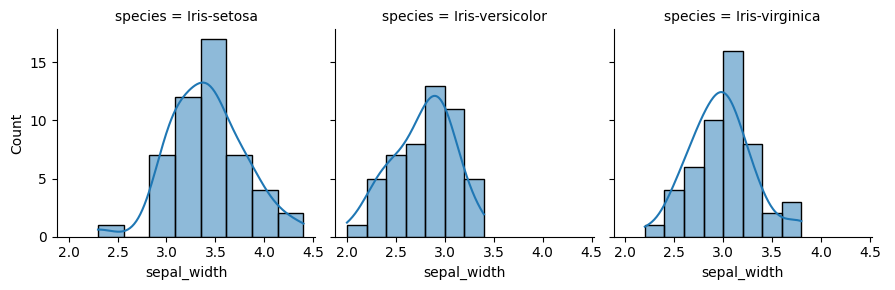

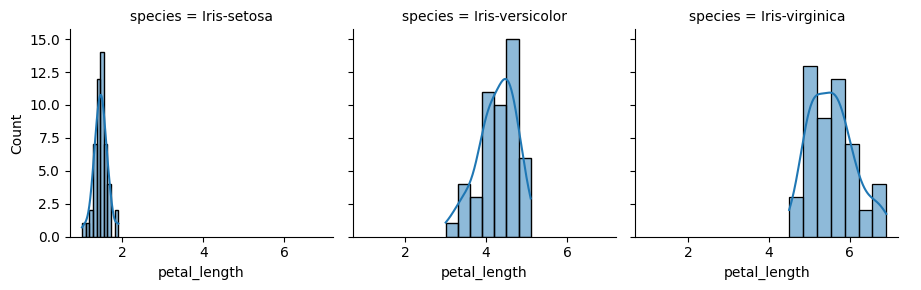

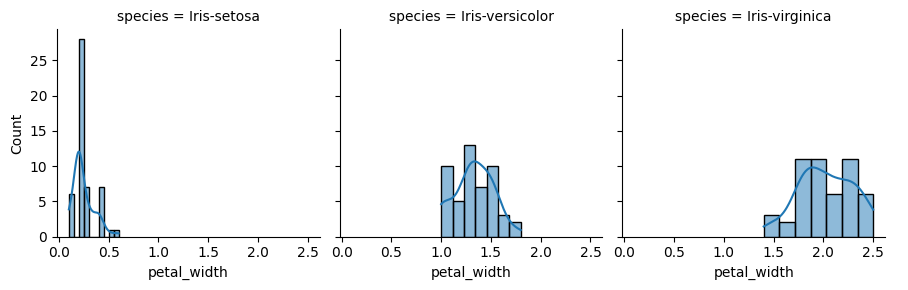

In [11]:
#from scipy.stats import norm
for idx, feature in enumerate(list(iris.columns)[:-1]):
  fg = sns.FacetGrid(iris, col='species', height=3)
  fg.map(sns.histplot, feature, kde=True).add_legend()
plt.show()


You could also make four axes, one per feature, combining in each one the histograms for the three classes.
The 'hue' parameter is used to represent with different colors information corresponding to the three classes ('species')

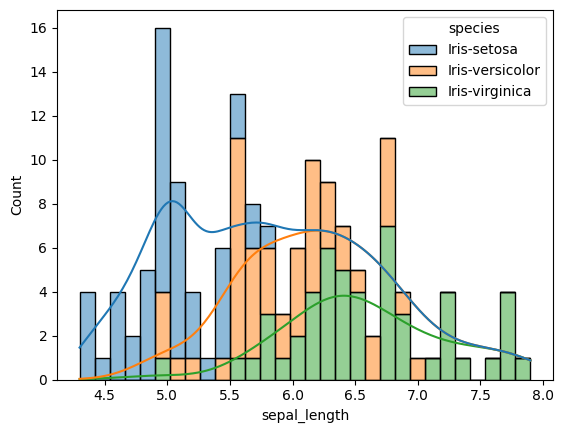

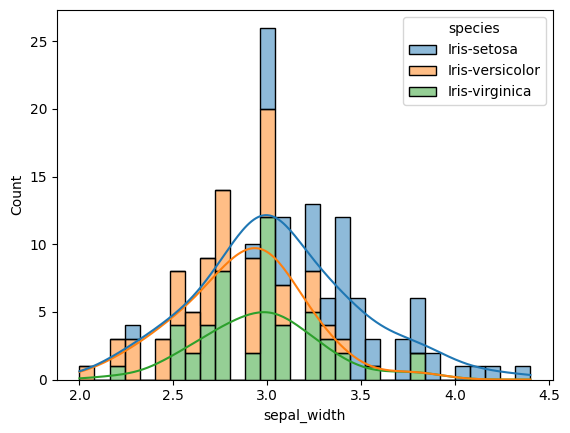

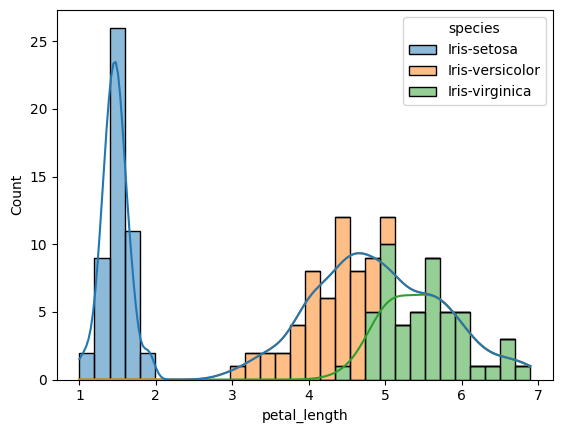

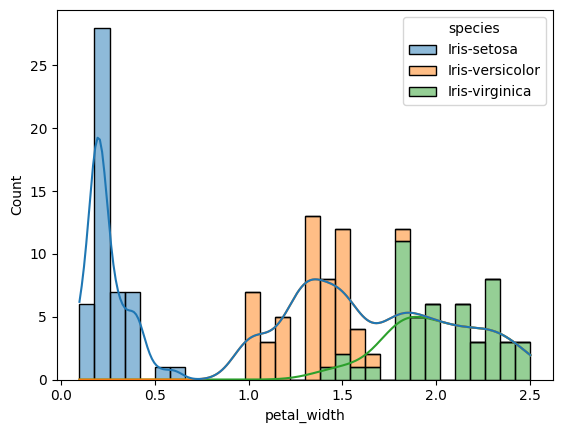

In [12]:
for idx, feature in enumerate(list(iris.columns)[:-1]):
    sns.histplot(data=iris, x=feature, hue="species",kde=True, bins=30, multiple="stack")
    plt.show()

###Cumulative distribution function
Now we plot the cdf per feature and class

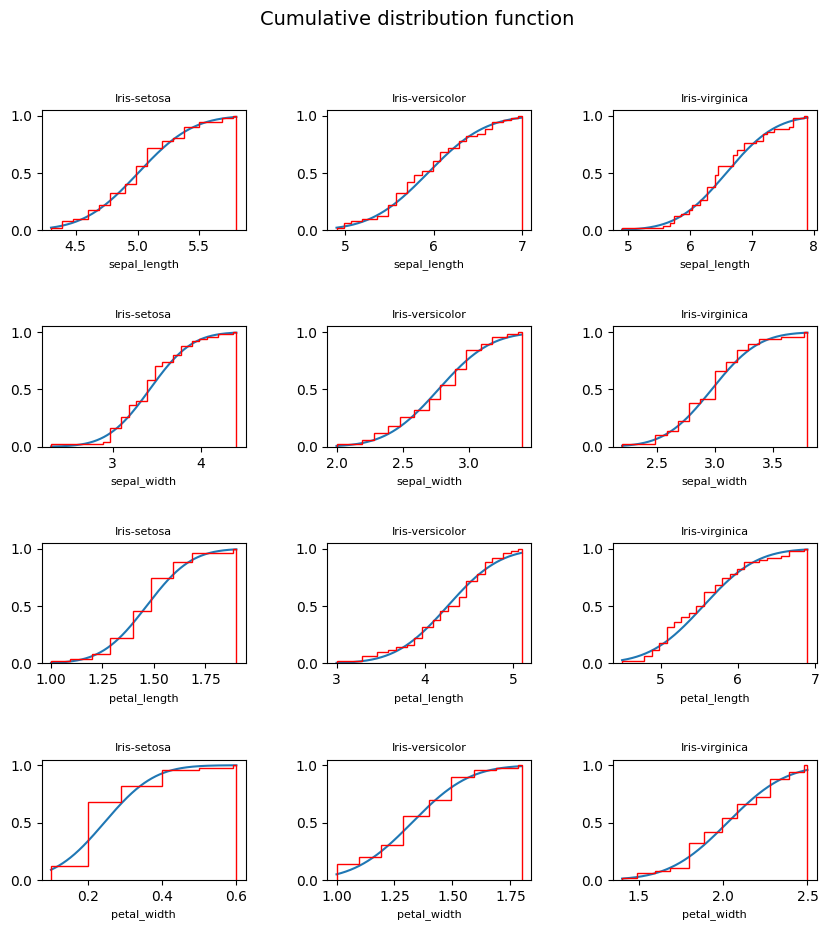

In [13]:
npoints = 1000
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=3)
fig.suptitle('Cumulative distribution function', fontsize=14)
fig.subplots_adjust(hspace=0.8, wspace=0.4)

# itererate over the classes and features
# extract the data and plot a separated plot with the cdf
for idx, feat_ in enumerate(["sepal_length","sepal_width","petal_length","petal_width"]):
  for idy, class_ in enumerate(["Iris-setosa","Iris-versicolor","Iris-virginica"]):
  #extract data
    x = iris[iris["species"]== class_][feat_]
    iax = 3*idx+idy+1

    plt.subplot(4,3,iax)

    xxx = np.linspace(np.min(x),np.max(x),npoints)
    ncdf = ss.norm.cdf(xxx,np.mean(x),np.std(x));
    plt.plot(xxx,ncdf)
    plt.hist(x, bins=50, density=True,histtype='step',cumulative=True,color='r')
    plt.title(class_, fontsize=8)
    plt.xlabel(feat_, fontsize=8)
    plt.axis('auto')

plt.show()

###Kurtosis and Skewness
We can compute kurtosis and skewness directly from Panda Data Frames, grouping samples by class:

In [14]:
iris.groupby('species').apply(pd.DataFrame.kurt)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,-0.252689,0.889251,1.031626,1.566442
Iris-versicolor,-0.533010,-0.366237,0.047903,-0.410059
Iris-virginica,0.032904,0.706071,-0.153779,-0.602264


In [15]:
iris.groupby('species').skew(axis=0)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


Or we compute the kurtosis of a single feature with `ss.kurtosis`

In [16]:
# kurtosis just for "Iris-setosa" and "sepal_length"
x = iris[iris["species"]== "Iris-setosa"]["sepal_length"]
ss.kurtosis(x,bias=False)

np.float64(-0.2526887962236595)

###Quantile-quantile plots

Generate a probability plot of sample data against the quantiles of a normal distribution.

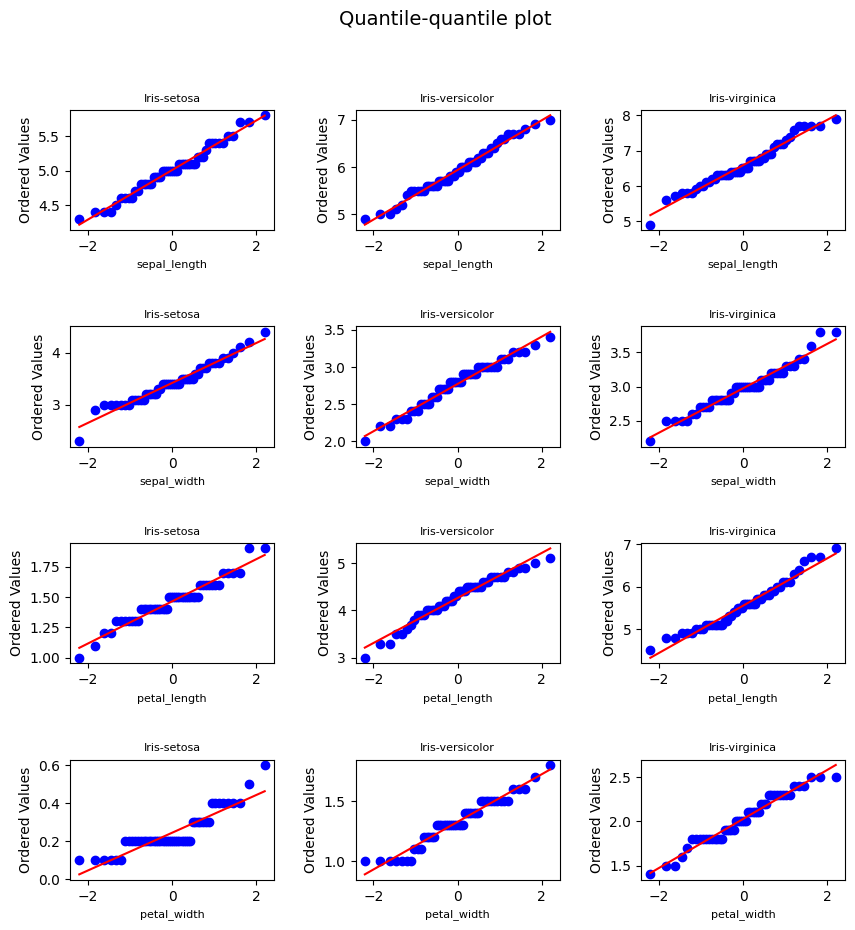

In [17]:
fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=3)
fig.suptitle('Quantile-quantile plot', fontsize=14)
fig.subplots_adjust(hspace=0.8, wspace=0.4)

# itererate over the classes and features
# extract the data and plot a separated plot with the cdf
for idx, feat_ in enumerate(["sepal_length","sepal_width","petal_length","petal_width"]):
  for idy, class_ in enumerate(["Iris-setosa","Iris-versicolor","Iris-virginica"]):
  #extract data
    x = iris[iris["species"]== class_][feat_]
    iax = 3*idx+idy+1

    plt.subplot(4,3,iax)

    ss.probplot(x, plot=plt)
    plt.title(class_, fontsize=8)
    plt.xlabel(feat_, fontsize=8)
    plt.axis('auto')

plt.show()


###Boxplots
A boxplot is a graph that indicates how the values in the data are spread out. Box plots visually represent the five number summary of the data points in a box.
The outliers are displayed as points outside the box.
1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

This is the boxplot for "petal length", using Pandas boxplot:

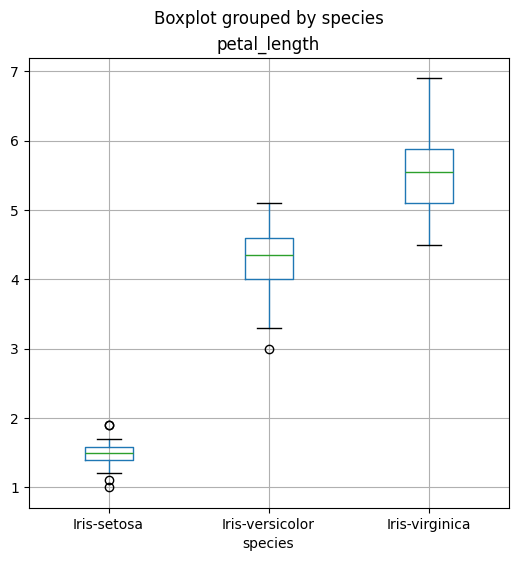

In [18]:
iris.boxplot(column="petal_length", by= "species",figsize= (6,6))
plt.show()
          

We can also use Seaborn, which produces fancier plots:

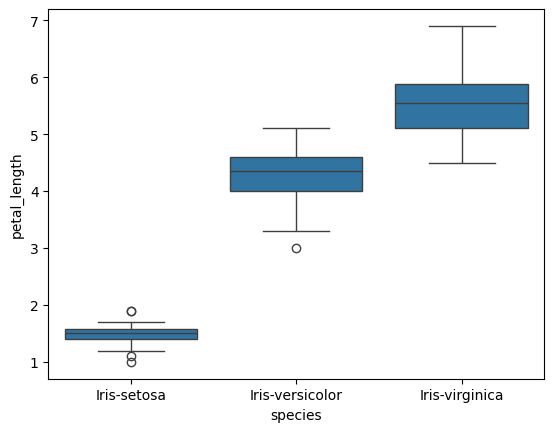

In [19]:
sns.boxplot(x='species',y='petal_length', data=iris) 
plt.draw()

<font color=red>**YOUR TASK:**</font>

<font color=red>Create boxplots for the other features (petal-width, sepal-length, sepal-width)</font>



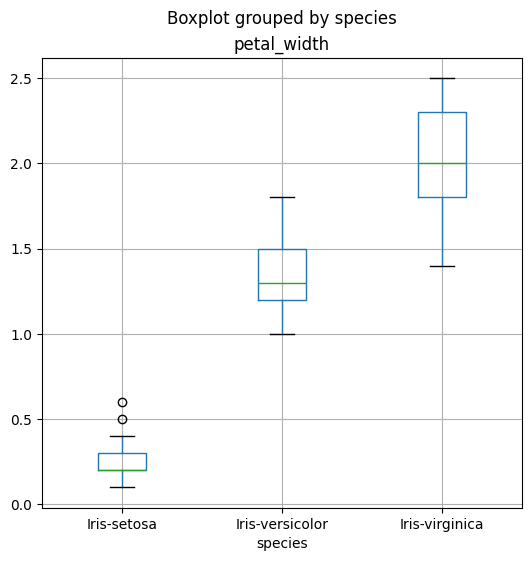

In [20]:
#Add code here:
iris.boxplot(column="petal_width", by= "species",figsize= (6,6))
plt.show()


###Violin Plots
A violin plot is the combination of a box plot a probability density function. It is like the whiskers plot, but instead of a box it represents the spread of data.

This is the violin plot for petal length:


AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'size'

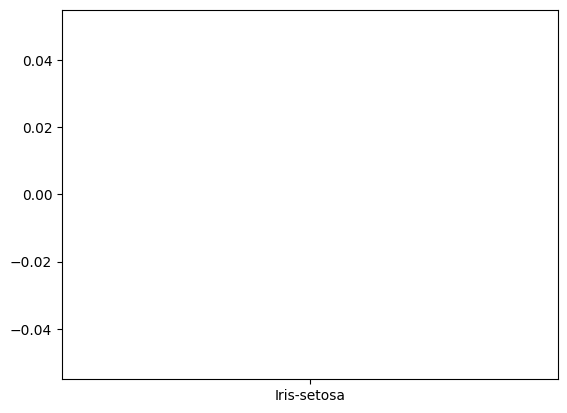

In [25]:
sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.draw()

###Scatter Plot
A Scatter (XY) Plot has points that show the relationship between two sets of data. Scatter plots show how much one variable is affected by another.

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis.

The following code produces a scatter plot with respect to the sepal length on x axis and sepal width on y-axis.
From the plot, we can say that sepal length varies from 4.0 to 8.0 while sepal width varies from 2.0 to 4.5


In [ ]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.draw()

You can also use Seaborn jointplot to draw a plot of two variables with bivariate and univariate graphs.


In [ ]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris);


We can add class information, using different colors


In [ ]:
fg =sns.FacetGrid(iris, hue="species", height=6)
fg.map(plt.scatter, "sepal_length", "sepal_width").add_legend();
plt.draw();


###Pair plot

This Seaborn function `pairplot` takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable.



In [ ]:
sns.pairplot(iris, hue="species", height=3);
plt.draw()